In [1]:
import pygmo as pg
import numpy as np

from f3dasm.simulation.benchmark_functions import Levy, Ackley, Schwefel
from f3dasm.src.optimization import PygmoProblem
from f3dasm.optimization.pygmo_implementations import UDA_SGD
from f3dasm.src.designofexperiments import DoE
from f3dasm.src.space import ContinuousSpace
from f3dasm.src.data import Data

In [2]:
def make_nd_continuous_design(bounds: list, dimensions: int):
    input_space, output_space = [], []
    for dim in range(dimensions):
        input_space.append(ContinuousSpace(name=f"x{dim}", lower_bound=bounds[0], upper_bound=bounds[1]))

    output_space.append(ContinuousSpace(name="y"))

    return DoE(input_space=input_space, output_space=output_space)

In [3]:
dimensions=5
design = make_nd_continuous_design(bounds=[-10.,10.], dimensions=dimensions)

In [4]:
# # Input parameters
# x1 = ContinuousSpace(name="x1", lower_bound=-10., upper_bound=10.)
# x2 = ContinuousSpace(name="x2", lower_bound=-10., upper_bound=10.)
# x3 = ContinuousSpace(name="x3", lower_bound=-10., upper_bound=10.)
# x4 = ContinuousSpace(name="x4", lower_bound=-10., upper_bound=10.)
# x5 = ContinuousSpace(name="x5", lower_bound=-10., upper_bound=10.)
# x6 = ContinuousSpace(name="x6", lower_bound=-10., upper_bound=10.)

# # Output parameters
# y = ContinuousSpace(name="y")

# input_space = [x1, x2, x3, x4 ,x5, x6]
# output_space = [y]

# # Construct the design space
# design = DoE(input_space=input_space, output_space=output_space)

In [5]:
# algorithm = pg.algorithm(pg.cmaes(gen=1, memory=True, seed=42, force_bounds=True))
algorithm = pg.algorithm(pg.cmaes(memory=True))
levy = Levy(noise=True)

prob = pg.problem(PygmoProblem(design=design, func=levy))

In [6]:
prob
pop = pg.population(prob, size = 30)
pop

Problem name: <class 'f3dasm.src.optimization.PygmoProblem'>
	C++ class name: pybind11::object

	Global dimension:			5
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10, -10, -10, -10]
	Upper bounds: [10, 10, 10, 10, 10]
	Has batch fitness evaluation: true

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 5
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 30
	Gradient evaluations: 0

	Thread safety: none

Population size: 30

List of individuals: 
#0:
	ID:			3150821444177864396
	Decision vector:	[-0.247075, -8.66199, -6.5322, -0.240843, 7.09789]
	Fitness vector:		[47.8095]
#1:
	ID:			5030192417719401195
	Decision vector:	[7.67801, -4.02693, 7.04425, 0.586001, 5.76261]
	Fitness vector:		[11.7169]
#2:
	ID:			17155582441310901182
	Decision vector:	[7.60796, -7.29869, -9.22112, -0.755838, 5.49931]

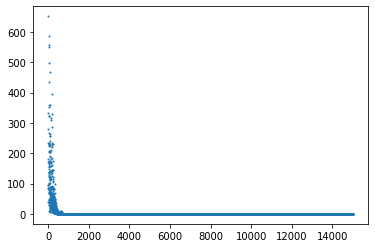

In [7]:
xx, yy = np.empty(shape=(1,dimensions)), np.empty(shape=(1,1))
# xx = np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])
# yy = levy.eval(xx)
for i in range(500):
    pop = algorithm.evolve(pop)
    xx = np.r_[xx, pop.get_x()]
    yy = np.r_[yy, pop.get_f()]


import pandas as pd
pd.DataFrame(data=yy)
import matplotlib.pyplot as plt

plt.scatter(np.arange(len(yy.ravel())),yy.ravel(), s=1)

yy
columnlabels = [("input",f"x{i}") for i in range(dimensions)]
columnlabels.append(("output", "y"))
columnlabels
df = pd.DataFrame(data=np.c_[xx,yy],columns=columnlabels)

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


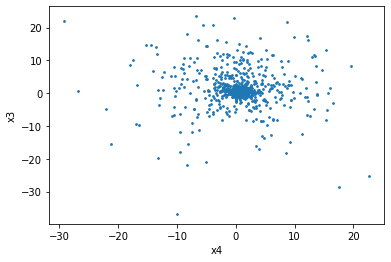

In [9]:
data = Data(design)
data.add(df)
data.plot(input_par1="x4", input_par2="x3")

In [ ]:
uda = algorithm.extract(pg.cmaes)

In [ ]:
prob.get_name()

In [ ]:
prob.gradient(np.array([0.3,0.2,0.1]))